In [17]:
%matplotlib inline

In [18]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib.image as img

Initialize dataset and random seed (for reproducible results)

In [19]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

# make immutable: we want to keep this data.
X_train_raw.flags.writeable = False
X_test_raw.flags.writeable = False
y_train_raw.flags.writeable = False
y_test_raw.flags.writeable = False

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

We print some samples of the input data just to show what it looks like.

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


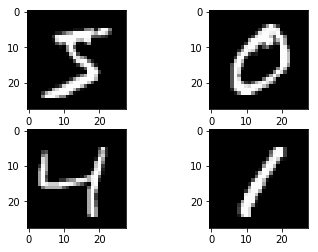

y_train_raw[0]: 5
y_train_raw[1]: 0
y_train_raw[2]: 4
y_train_raw[3]: 1


In [20]:
print("X_train shape:", X_train_raw.shape)
print("y_train shape:", y_train_raw.shape)
print("X_test shape:", X_test_raw.shape)
print("y_test shape:", y_test_raw.shape)

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train_raw[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train_raw[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train_raw[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train_raw[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

for i in range(0,4):
    print("y_train_raw[%d]:" % i, y_train_raw[i])

X_train_flattened shape: (60000, 784)
X_test_flattened shape: (10000, 784)


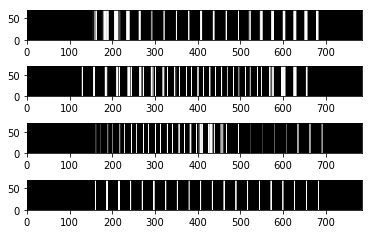

y_train_raw[0]: 5
y_train_raw[1]: 0
y_train_raw[2]: 4
y_train_raw[3]: 1


In [21]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train_raw.shape[1] * X_train_raw.shape[2]
X_train_flattened = X_train_raw.reshape(X_train_raw.shape[0], num_pixels).astype('float32')
X_test_flattened = X_test_raw.reshape(X_test_raw.shape[0], num_pixels).astype('float32')

print("X_train_flattened shape:", X_train_flattened.shape)
print("X_test_flattened shape:", X_test_flattened.shape)
plt.subplot(411)
plt.imshow([X_train_flattened[0]], cmap=plt.get_cmap('gray'), extent = (0, 784, 0, 70), aspect='equal')
plt.subplot(412)
plt.imshow([X_train_flattened[1]], cmap=plt.get_cmap('gray'), extent = (0, 784, 0, 70), aspect='equal')
plt.subplot(413)
plt.imshow([X_train_flattened[2]], cmap=plt.get_cmap('gray'), extent = (0, 784, 0, 70), aspect='equal')
plt.subplot(414)
plt.imshow([X_train_flattened[3]], cmap=plt.get_cmap('gray'), extent = (0, 784, 0, 70), aspect='equal')
plt.show()

for i in range(0,4):
    print("y_train_raw[%d]:" % i, y_train_raw[i])

In [22]:
# normalize inputs from 0-255 to 0-1
X_train = X_train_flattened / 255
X_test = X_test_flattened / 255
print("X_train shape: still", X_train.shape)
print("X_test shape: still", X_test.shape)

X_train shape: still (60000, 784)
X_test shape: still (10000, 784)


In [23]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train_raw)
y_test = np_utils.to_categorical(y_test_raw)
num_classes = y_test.shape[1]
print("y_test_raw[0]: ", y_test_raw[0])
print("y_test[0]: ", y_test[0])

y_test_raw[0]:  7
y_test[0]:  [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [24]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [25]:
def print_weights(layer):
    weights = layer.get_weights()
    input_weights = weights[0]
    bias_vector = weights[1]
    print("input weights shape:", numpy.array(input_weights).shape)
    print("bias vector shape:", numpy.array(bias_vector).shape)
    print("input weights first neuron:", input_weights[0])
    print("bias vector:", bias_vector)

    
def visualize_model(model):
    for layer in model.layers:
        print("units:", layer.units)
        print("input:", layer.input)
        print("output:", layer.output)
        print_weights(layer)

In [28]:
# build the model
model = baseline_model()
#visualize_model(model)

In [30]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
#visualize_model(model)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2717 - acc: 0.9228 - val_loss: 0.1393 - val_acc: 0.9597
Epoch 2/10
 - 6s - loss: 0.1101 - acc: 0.9681 - val_loss: 0.0957 - val_acc: 0.9703
Epoch 3/10
 - 6s - loss: 0.0698 - acc: 0.9801 - val_loss: 0.0738 - val_acc: 0.9773
Epoch 4/10
 - 7s - loss: 0.0491 - acc: 0.9860 - val_loss: 0.0693 - val_acc: 0.9786
Epoch 5/10
 - 7s - loss: 0.0357 - acc: 0.9899 - val_loss: 0.0664 - val_acc: 0.9791
Epoch 6/10
 - 6s - loss: 0.0260 - acc: 0.9933 - val_loss: 0.0669 - val_acc: 0.9791
Epoch 7/10
 - 6s - loss: 0.0199 - acc: 0.9950 - val_loss: 0.0600 - val_acc: 0.9803
Epoch 8/10
 - 6s - loss: 0.0151 - acc: 0.9963 - val_loss: 0.0597 - val_acc: 0.9803
Epoch 9/10
 - 6s - loss: 0.0106 - acc: 0.9978 - val_loss: 0.0637 - val_acc: 0.9799
Epoch 10/10
 - 6s - loss: 0.0071 - acc: 0.9989 - val_loss: 0.0586 - val_acc: 0.9812
Baseline Error: 1.88%


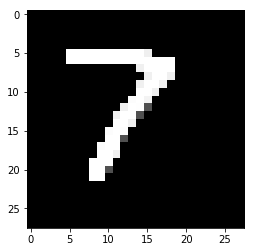

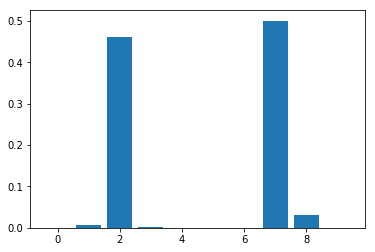

Most likely: 7


In [66]:
fromfile = img.imread("../drawingboard/digit.png")
reduced = fromfile[:,:,0]
plt.imshow(reduced, cmap=plt.get_cmap('gray'))
plt.show()
test = reduced.reshape(784)
predicted = model.predict(numpy.array([test]), 1)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], predicted[0], align='center')
plt.show()
print("Most likely:", numpy.argmax(predicted))

In [39]:
def read_digit(sequence_number):
    fromfile = img.imread("../sevens/digit" + str(sequence_number) + ".png")
    reduced = fromfile[:,:,0]
    plt.imshow(reduced, cmap=plt.get_cmap('gray'))
    #plt.show()
    return reduced.reshape(784)

(60000, 10)
(1000, 10)
(1000, 784)
(61000, 784)
Train on 61000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0638 - val_acc: 0.9837
Epoch 2/10
 - 9s - loss: 9.1486e-04 - acc: 1.0000 - val_loss: 0.0637 - val_acc: 0.9832
Epoch 3/10
 - 7s - loss: 7.6482e-04 - acc: 1.0000 - val_loss: 0.0647 - val_acc: 0.9841
Epoch 4/10
 - 6s - loss: 6.3337e-04 - acc: 1.0000 - val_loss: 0.0661 - val_acc: 0.9832
Epoch 5/10
 - 6s - loss: 5.4749e-04 - acc: 1.0000 - val_loss: 0.0660 - val_acc: 0.9836
Epoch 6/10
 - 7s - loss: 4.6231e-04 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9839
Epoch 7/10
 - 7s - loss: 3.5046e-04 - acc: 1.0000 - val_loss: 0.0685 - val_acc: 0.9839
Epoch 8/10
 - 6s - loss: 3.0071e-04 - acc: 1.0000 - val_loss: 0.0686 - val_acc: 0.9847
Epoch 9/10
 - 7s - loss: 2.6077e-04 - acc: 1.0000 - val_loss: 0.0689 - val_acc: 0.9842
Epoch 10/10
 - 7s - loss: 2.1268e-04 - acc: 1.0000 - val_loss: 0.0698 - val_acc: 0.9835
Baseline Error: 1.65%


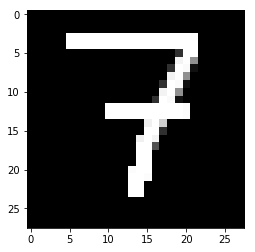

In [67]:
five_sevens = [ read_digit(1), read_digit(2), read_digit(3), read_digit(4), read_digit(5)]
sevens = list()
for i in range(0,1000):
    sevens.append(five_sevens[i % 5])
    
new_data = numpy.array(sevens)
y_sevens = [7 for x in range(1000)]
y_sevens_bitmask = numpy.array([numpy.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]).transpose() for x in range(1000)])
print(y_train.shape)
print(y_sevens_bitmask.shape)
print(new_data.shape)
new_x=numpy.append(X_train, new_data, axis=0)
print(new_x.shape)
model.fit(new_x, numpy.append(y_train, y_sevens_bitmask, axis=0), validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))